In [41]:
import pandas as pd
from matplotlib import pylab
from scipy.stats import stats, probplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as plt
import scipy
import numpy as np
from statsmodels.stats.weightstats import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\my files\python\pythonproject\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
data = pd.read_csv('diamonds.txt', sep='\t')
y = data['price']
data = data.drop('price', axis=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=1)

In [4]:
clf1 = LinearRegression().fit(X_train, y_train)

In [5]:
clf2 = RandomForestRegressor(n_estimators=10, random_state=1).fit(X_train, y_train)

In [6]:
predict1 = clf1.predict(X_test)
predict2 = clf2.predict(X_test)

In [27]:
abs_lr = abs(y_test.values - predict1)

In [28]:
abs_rf = abs(y_test.values - predict2)

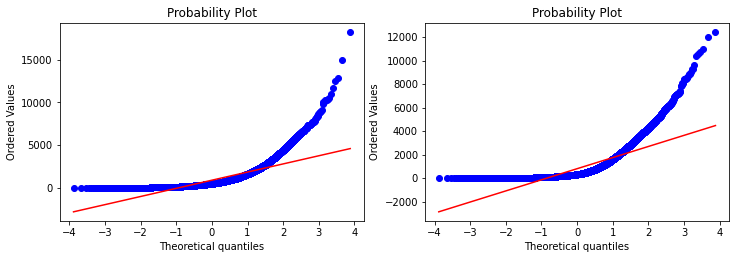

In [37]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
probplot(abs_lr, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
probplot(abs_rf, dist="norm", plot=pylab)
pylab.show()

In [38]:
scipy.stats.ttest_rel(abs_lr, abs_rf)

Ttest_relResult(statistic=13.01772978387902, pvalue=1.6551745751315097e-38)

In [45]:
cm=DescrStatsW(abs_lr - abs_rf).tconfint_mean()
print( "95%% confidence interval: [%f, %f]" %cm)

95% confidence interval: [74.287245, 100.624521]
